In [1]:
import csv 
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import random as rnd
rnd.seed()
import math as math

In [2]:
Data = open('EdgeList.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.DiGraph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,
                      nodetype=int, data=(('certainty', float),))

In [3]:
#Habitats Dict              
with open('Habitats.csv', newline='') as csvfile:
    habData = list(csv.reader(csvfile))
habData = habData[1:len(habData)]
habitatsDict = {}
for i in range(len(habData)):
    habitatsDict[i+1] =habData[i][1]

#Certainty Dict
certaintyDict = {}
for u,v in G.edges():
    certaintyDict[u,v] = G.get_edge_data(u,v)['certainty']

In [4]:
#Find the Basal Species
TL = {}
Basal = []
for i in G.nodes():
    if len(G.edges(i)) == 0:
        Basal.append(i)
        TL[i] = 1

In [5]:
for i in G.nodes():
    if i not in Basal:
        lens = []
        for j in Basal:
            if nx.has_path(G,source=i,target=j):
                lens.append(nx.shortest_path_length(G,source=i,target=j))
        TL[i] = 1 + sum(lens)/len(lens)

In [6]:
certaintyDict = {}
for u,v in G.edges():
    certaintyDict[u,v] = G.get_edge_data(u,v)['certainty']

In [7]:
def calcTL(G):
    #Find the Basal Species
    TL = {}
    Basal = []
    for i in G.nodes():
        if len(G.edges(i)) == 0:
            Basal.append(i)
            TL[i] = 1

    for i in G.nodes():
        if i not in Basal:
            lens = []
            for j in Basal:
                if nx.has_path(G,source=i,target=j):
                    lens.append(nx.shortest_path_length(G,source=i,target=j))
            TL[i] = 1 + sum(lens)/len(lens)

    tot = 0
    for i in G.nodes():
        tot += TL[i]
    meanTL = tot/G.order()
    
    return TL

In [8]:
def drawG(G,TL,trophDict,certaintyDict):
    colors = {}
    for i in G.nodes():
        TR = trophDict[i][0:4]
        if TR == 'herb':
            colors[i] = 'orange'
        elif TR == 'inse':
            colors[i] = 'orange'
        elif TR == 'detr':
            colors[i] = 'yellow'
        elif TR == 'orga':
            colors[i] = 'green'
        elif TR == 'para':
            colors[i] = 'yellow'
        elif TR == 'chem':
            colors[i] = 'blue'
        elif TR == 'auto':
            colors[i] = 'green'
        elif TR == 'myxo':
            colors[i] = 'green'
        elif TR == 'hete':
            colors[i] = 'orange'
        elif TR == 'pisc':
            colors[i] = 'orange'
        elif TR == 'omni':
            colors[i] = 'orange'
        elif TR == 'fung':
            colors[i] = 'yellow'
        elif TR == 'sapr':
            colors[i] = 'blue'
        elif TR == 'moll':
            colors[i] = 'yellow'
        elif TR == 'pred':
            colors[i] = 'orange'
        elif TR == 'epip':
            colors[i] = 'orange'


    deg = {}
    for i in G.nodes():
        deg[i] = G.degree(i)
    mind = min(deg.values())
    maxd = max(deg.values())
    m = 1/(mind-maxd)

    fig = plt.figure(figsize=(10,7))
    ax = Axes3D(fig)
    
    pos = {}
    for i in G.nodes():
        r = m*deg[i]
        x = 2*(rnd.random() - 0.5)
        y = 2*(rnd.random() - 0.5)
        pos[i] = {}
        pos[i]['x'] = x
        pos[i]['y'] = y
        pos[i]['z'] = TL[i]
        ax.scatter(x,y,TL[i],c=colors[i],s=40)



    for i,j in enumerate(G.edges()):
        x = np.array((pos[j[0]]['x'], pos[j[1]]['x']))
        y = np.array((pos[j[0]]['y'], pos[j[1]]['y']))
        z = np.array((pos[j[0]]['z'], pos[j[1]]['z']))
        if certaintyDict[j[0],j[1]] == 1:
            col = 'black'
        elif certaintyDict[j[0],j[1]] == 2:
            col = 'dimgray'
        elif certaintyDict[j[0],j[1]] == 3:
            col = 'lightgray'
        
        ax.plot(x, y, z, c=col, alpha=0.23)

    ax.view_init(elev=3., azim=45)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('Trophic Level', fontsize=15,rotation = 90)
    ax.set_xticks([]) 
    ax.set_yticks([]) 

    return

In [9]:
with open('TrophicRole.csv', newline='') as csvfile:
    trophData = list(csv.reader(csvfile))
trophData = trophData[1:len(trophData)]
trophDict = {}
for i in range(len(trophData)):
    trophDict[i+1] = trophData[i][1]

In [10]:
GL = nx.DiGraph() #Land i.e. terrestrial and amphibious species
GW = nx.DiGraph() #Water i.e. aquatic and amphibious species

habNums = [0,0,0]
for node in G.nodes():
    #print(node)
    hab = habitatsDict[node]
    edgeList = G.edges(node)
    if(hab == '1'): #Terrestrial
        habNums[0] += 1
        GL.add_node(node)
        for e in edgeList:
            GL.add_edge(*e) # unpack edge tuple*

        #GL.add_edges_from(edgeList)
    elif(hab == '2'): #Aquatic
        habNums[1] += 1
        GW.add_node(node)
        for e in edgeList:
            GW.add_edge(*e) # unpack edge tuple*

        #GW.add_edges_from(edgeList)
    elif(hab == '3'): #Amphibious
        habNums[2] += 1
        GL.add_node(node)
        GW.add_node(node)
        for e in edgeList:
            if(e[1] == 1):
                GL.add_edge(*e) # unpack edge tuple*
            elif(e[1] == 2):
                GW.add_edge(*e)
            elif(e[1] == 3):
                GL.add_edge(*e)
                GW.add_edge(*e)

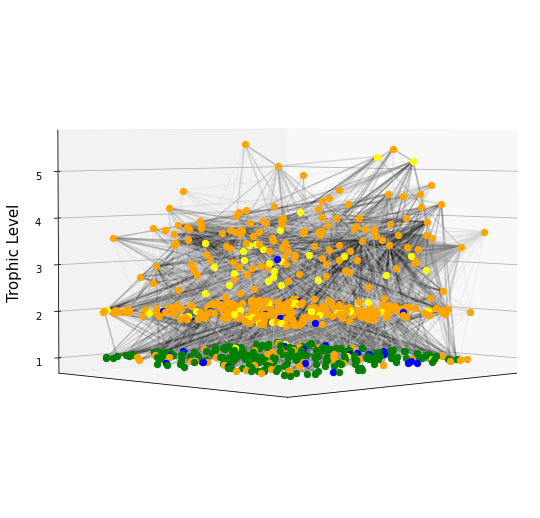

In [11]:
TLGL = calcTL(GL)
drawG(GL,TLGL,trophDict,certaintyDict)

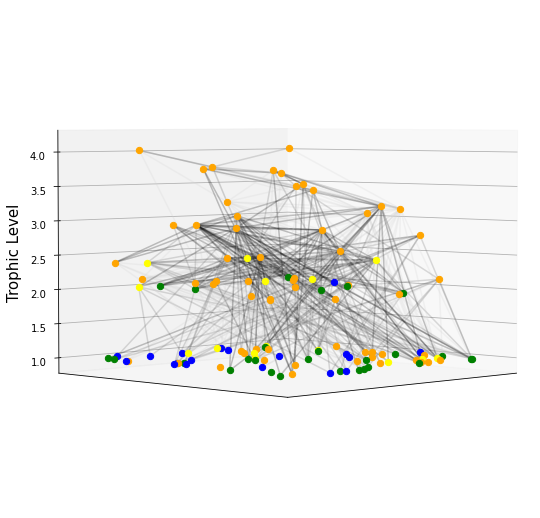

In [12]:
TLGW = calcTL(GW)
drawG(GW,TLGW,trophDict,certaintyDict)

In [13]:
def prob(ndj,cdi,rdi):
    alpha = 0.999
    return alpha*math.exp(-(abs((ndj-cdi)/(rdi/2))**2))

In [14]:
def likelihood(G,n,c,r):
    likelihood = 0
    for i in G.nodes():
        for j in G.nodes():
            if i in dict(G.in_edges(j)):
                likelihood += np.log(prob(n[j],c[i],r[i]))
            else:
                likelihood += np.log(1 - prob(n[j],c[i],r[i]))
    
    return likelihood

In [15]:
def initPNM(G,TL):
    n = {}
    c = {}
    r = {}
    #randomize the trophic Levels slightly to prevent ties in niche space
    TLnew = {}
    for i in G.nodes():
        TLnew[i] = TL[i] + (0.001*(rnd.random()-0.5))
    #init the niche pos, diet pos, and feeding range of each node
    TLmin = min(list(TLnew.values()))
    TLmax = max(list(TLnew.values()))
    TLdif = TLmax-TLmin
    for i in G.nodes():
        if TL[i] != 1:
            n[i] = (TLnew[i]-TLmin)/(TLdif)
            c[i] = rnd.random()
            r[i] = rnd.random() + 0.1 
        else:
            n[i] = (TLnew[i]-TLmin)/(TLdif)
            c[i] = 0
            r[i] = 0.000001
    
    for i in G.nodes():
        if len(G.edges(i)) == 1:
            for j in G.edges(i):
                c[i] = n[j[1]]
            r[i] = 0.000001
        
    return n,c,r

In [16]:
def simAnnealing(G,TL,n,c,r):
    best = likelihood(G,n,c,r)
    last = best
    ct = dict(c)
    rt = dict(r)
    cbest = dict(c)
    rbest = dict(r)
    
    for i in G.nodes():
        if TL[i] != 1 and len(G.edges(i)) != 1:
            ctest = c[i] + rnd.gauss(0,0.1)
            while(ctest > 1 or ctest < 0):
                ctest = c[i] + rnd.gauss(0,0.1)
            ctlast = ct[i]
            ct[i] = ctest
            test = likelihood(G,n,ct,rbest)
            if rnd.random() > test/last:
                last = test
            else:
                ct[i] = ctlast
            if test > best:
                best = test
                cbest = dict(ct)
            
    for i in G.nodes():
        if TL[i] != 1 and len(G.edges(i)) != 1:
            rtest = r[i] + rnd.gauss(0,0.2)
            while(rtest < 0.1 or rtest > 10):
                rtest = r[i] + rnd.gauss(0,0.2)
            rtlast = rt[i]
            rt[i] = rtest
            test = likelihood(G,n,cbest,rt)
            if rnd.random() > test/last:
                last = test
            else:
                rt[i] = rtlast
            if test > best:
                best = test
                rbest = dict(rt)
        
    return cbest,rbest,best

In [17]:
def iterSim(G,TL,n,c,r):
    iter = 0
    test = likelihood(G,n,c,r)
    best = test
    last = test
    ctest = dict(c)
    rtest = dict(r)
    cbest = dict(c)
    rbest = dict(r)
    #while(test >= last):
    for i in range(300):
        last = test
        ctest,rtest,test = simAnnealing(G,TL,n,dict(cbest),dict(rbest))
        if test > best:
            best = test
            cbest = dict(ctest)
            rbest = dict(rtest)
        iter += 1
        print(iter)
        print(best)
    return cbest,rbest,best

In [18]:
def fe(G,n,c,r):
    fe = 0
    for i in G.nodes():
        for j in G.nodes():
            if i in dict(G.in_edges(j)):
                fe += prob(n[j],c[i],r[i])
                
    return fe/G.size()

In [19]:
def calculate_AUC(TPR,FPR):
    # see Lecture Notes 4
    # input : the TPR and FPR columns of your table (which have equal length and where TPR[0]=FPR[0]=0)
    # output: the AUC, a scalar on the unit interval

    ####################################
    ##### do not modify above here #####

    AUC = 0
    for i in range(1,len(TPR)):
        AUC += TPR[i]*(FPR[i]-FPR[i-1])
    
    return AUC

In [20]:
def ROC(G,n,c,r):
    table = []
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                if i in dict(G.in_edges(j)):
                    t = 1
                else:
                    t = 0
                row = []
                row = [i,j,t,prob(n[j],c[i],r[i])]
                table.append(row)
    tableSort = sorted(table, key=lambda x: x[3], reverse=True)
    T = G.size()
    F = G.order()*(G.order()-1) - T
    TPR = []
    FPR = []
    TPRtot = 0
    FPRtot = 0
    for i in tableSort:
        if i[2] == 1:
            TPRtot += 1
            TPR.append(TPRtot/T)
            FPR.append(FPRtot/F)
        else:
            FPRtot += 1
            TPR.append(TPRtot/T)
            FPR.append(FPRtot/F)
            
    AUC = calculate_AUC(TPR,FPR)
            
    TPRbase = []
    FPRbase = []
    tot = 100
    for i in range(tot):
        TPRbase.append(i/tot)
        FPRbase.append(i/tot)
        
    plt.plot(FPR,TPR,label='PNM')
    plt.plot(FPRbase,TPRbase,label='y=x')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve for the Aquatic Network')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return AUC

In [ ]:
n = {}
c = {}
r = {}
n,c,r = initPNM(GW,TLGW)
cbest,rbest,best = iterSim(GW,TLGW,n,c,r)
fe = fe(GW,n,cbest,rbest)
AUC = ROC(GW,n,cbest,rbest)

1
-7342.3206513515515
2
-7342.3206513515515
3
-7310.448911570539
4
-7273.4398431173895
5
-7273.4398431173895
6
-7078.157381426047
7
-7078.157381426047
8
-7078.157381426047
9
-7033.096592627525
10
-7033.096592627525
11
-7033.096592627525
12
-7033.096592627525
13
-7033.096592627525
14
-7033.096592627525
15
-7033.096592627525
16
-7033.096592627525
17
-7033.096592627525
18
-7033.096592627525
19
-7033.096592627525
20
-7033.096592627525
21
-7033.096592627525
22
-7033.096592627525
23
-7033.096592627525
24
-7033.096592627525
25
-7027.098897486553
26
-7027.098897486553
27
-7027.098897486553
28
-7027.098897486553
29
-7027.098897486553
30
-7024.598345499639
31
-7024.598345499639
32
-7024.598345499639


In [ ]:
max(TLGW.values())